In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm_notebook
import re

In [ ]:
nbr_inds= []+list(range(1,4))

In [ ]:
def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        #print(nbr_inds)
        #print(tokens[i])
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            #print('X:',word_to_id[tokens[i]])
            #print(tokens[j])
            Y.append(word_to_id[tokens[j]])
            #print('Y:',word_to_id[tokens[j]])

    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)

    return X, Y

In [ ]:
doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."
tokens = tokenize(doc)
print(tokens)
word_to_id, id_to_word = mapping(tokens)
print(word_to_id)
print(id_to_word)
X, Y = generate_training_data(tokens, word_to_id, 3)
print(X)
print(Y)
vocab_size = len(id_to_word)
print(vocab_size)
m = Y.shape[1]
print(m)
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1
print(Y_one_hot)

['after', 'the', 'deduction', 'of', 'the', 'costs', 'of', 'investing', 'beating', 'the', 'stock', 'market', 'is', 'a', "loser's", 'game']
{'stock': 0, 'investing': 1, 'the': 2, 'is': 3, 'beating': 4, 'a': 5, 'of': 6, "loser's": 7, 'market': 8, 'deduction': 9, 'costs': 10, 'game': 11, 'after': 12}
{0: 'stock', 1: 'investing', 2: 'the', 3: 'is', 4: 'beating', 5: 'a', 6: 'of', 7: "loser's", 8: 'market', 9: 'deduction', 10: 'costs', 11: 'game', 12: 'after'}
[[12 12 12  2  2  2  2  9  9  9  9  9  6  6  6  6  6  6  2  2  2  2  2  2
  10 10 10 10 10 10  6  6  6  6  6  6  1  1  1  1  1  1  4  4  4  4  4  4
   2  2  2  2  2  2  0  0  0  0  0  0  8  8  8  8  8  8  3  3  3  3  3  3
   5  5  5  5  5  7  7  7  7 11 11 11]]
[[ 2  9  6 12  9  6  2 12  2  6  2 10 12  2  9  2 10  6  2  9  6 10  6  1
   9  6  2  6  1  4  6  2 10  1  4  2  2 10  6  4  2  0 10  6  1  2  0  8
   6  1  4  0  8  3  1  4  2  8  3  5  4  2  0  3  5  7  2  0  8  5  7 11
   0  8  3  7 11  8  3  5 11  3  5  7]]
13
84
[[0. 0. 0. .

In [ ]:
Y.flatten()

array([ 0,  8,  2,  5,  8,  2,  0,  5,  0,  2,  0,  3,  5,  0,  8,  0,  3,
        2,  0,  8,  2,  3,  2, 11,  8,  2,  0,  2, 11,  7,  2,  0,  3, 11,
        7,  0,  0,  3,  2,  7,  0,  4,  3,  2, 11,  0,  4,  9,  2, 11,  7,
        4,  9, 12, 11,  7,  0,  9, 12,  6,  7,  0,  4, 12,  6, 10,  0,  4,
        9,  6, 10,  1,  4,  9, 12, 10,  1,  9, 12,  6,  1, 12,  6, 10])

In [ ]:
np.arange(84)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [ ]:
Y.shape

(1, 84)

In [ ]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01

    # assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01

    #assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)

    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W

    return parameters

In [ ]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T

    assert(word_vec.shape == (WRD_EMB.shape[1], m))

    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)

    assert(Z.shape == (W.shape[0], m))

    return W, Z

def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)

    assert(softmax_out.shape == Z.shape)
    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)

    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z

    return softmax_out, caches

In [ ]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

In [ ]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y

    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]

    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)

    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)

    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec

    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]

    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']


In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]

    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)

    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        #print(batch_inds)
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)

        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))

    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

Cost after epoch 0: 2.5521721116885634
Cost after epoch 10: 2.5518728335290817
Cost after epoch 20: 2.5515631818966322
Cost after epoch 30: 2.551227211923395
Cost after epoch 40: 2.550848986573052
Cost after epoch 50: 2.5504115473772697
Cost after epoch 60: 2.5499065163627157
Cost after epoch 70: 2.5493086914266736
Cost after epoch 80: 2.5485957622184108
Cost after epoch 90: 2.547743637274067
Cost after epoch 100: 2.5467249693764744
Cost after epoch 110: 2.5455323475388885
Cost after epoch 120: 2.5441185061800304
Cost after epoch 130: 2.542443114947581
Cost after epoch 140: 2.5404628779457865
Cost after epoch 150: 2.538128831171577
Cost after epoch 160: 2.535439136913629
Cost after epoch 170: 2.5323041782368705
Cost after epoch 180: 2.528655838081857
Cost after epoch 190: 2.5244261507568666
Cost after epoch 200: 2.519543560994052
Cost after epoch 210: 2.5140426093298798
Cost after epoch 220: 2.5077879441081663
Cost after epoch 230: 2.5007084733394143
Cost after epoch 240: 2.49275551595

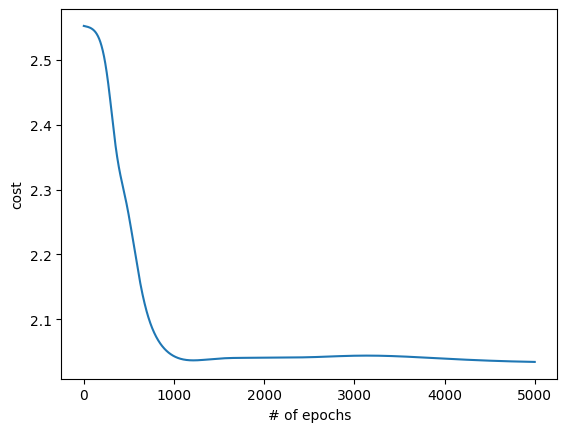

In [ ]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 5000, batch_size=128, parameters=None, print_cost=True)

In [ ]:
X_test = np.arange(vocab_size)
print(X_test.shape)
X_test = np.expand_dims(X_test, axis=0)
print(X_test.shape)
softmax_test, _ = forward_propagation(X_test, paras)
print(softmax_test)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]
print(top_sorted_inds)

(13,)
(1, 13)
[[2.90837764e-02 2.08496752e-01 8.85757791e-02 1.25822002e-01
  1.56701545e-01 1.26252316e-01 3.98542961e-03 1.25631284e-01
  6.67041331e-02 1.92339643e-02 1.28840632e-02 6.66255112e-02
  2.03462057e-02]
 [1.90280149e-01 2.39692730e-05 7.76211987e-02 1.21679859e-03
  1.21638178e-01 1.20506251e-03 5.08379070e-02 1.19023308e-03
  1.57975775e-02 3.71979431e-03 9.77800128e-02 1.57631373e-02
  8.15532564e-04]
 [8.53966922e-02 3.64127438e-01 7.81967272e-02 5.48917307e-02
  8.74166359e-02 5.50793744e-02 3.90923670e-01 5.48548657e-02
  4.54937907e-02 2.07235643e-01 1.14580926e-01 4.56042414e-02
  2.20366368e-01]
 [1.41355354e-01 4.24382585e-02 1.25792763e-01 1.18953415e-01
  4.95815662e-02 1.19306731e-01 1.40080004e-02 1.18589224e-01
  1.93002911e-01 2.28767077e-02 4.29200774e-02 1.93106395e-01
  2.63524394e-03]
 [9.78261174e-02 9.37641720e-02 1.00813225e-01 1.09159601e-02
  9.58077116e-03 1.08660715e-02 7.78907295e-02 1.07990599e-02
  9.96754762e-02 5.08362151e-02 2.31116516e-01

In [ ]:
for input_ind in range(vocab_size):
    print(input_ind)
    input_word = id_to_word[input_ind]
    print(input_word)
    print(top_sorted_inds[::-1,input_ind])
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))
#After the deduction of the costs of investing, beating deduction the stock market deduction is a loser's game."

0
stock
[1 5 3 8]
stock's neighbor words: ['investing', 'a', 'is', 'market']
1
investing
[2 0 4 7]
investing's neighbor words: ['the', 'stock', 'beating', "loser's"]
2
the
[3 6 4 0]
the's neighbor words: ['is', 'of', 'beating', 'stock']
3
is
[11  8  7  0]
is's neighbor words: ['game', 'market', "loser's", 'stock']
4
beating
[ 8  0 10  1]
beating's neighbor words: ['market', 'stock', 'costs', 'investing']
5
a
[11  8  7  0]
a's neighbor words: ['game', 'market', "loser's", 'stock']
6
of
[ 2  6 10  4]
of's neighbor words: ['the', 'of', 'costs', 'beating']
7
loser's
[11  8  0  7]
loser's's neighbor words: ['game', 'market', 'stock', "loser's"]
8
market
[3 7 5 4]
market's neighbor words: ['is', "loser's", 'a', 'beating']
9
deduction
[10 12  2  4]
deduction's neighbor words: ['costs', 'after', 'the', 'beating']
10
costs
[4 6 9 2]
costs's neighbor words: ['beating', 'of', 'deduction', 'the']
11
game
[3 7 5 4]
game's neighbor words: ['is', "loser's", 'a', 'beating']
12
after
[ 6  2  9 10]
afte